In this Lab, you are required to create the K-NN classifier and a regressor using the Knowledge from the previous Lecture

1. Complete all the code in the block below for the K-NN Classifier

In [1]:
# Import Python packages here
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the iris dataset
df_iris = pd.read_csv("/Users/suryakurapati/Desktop/NCI/NCI-Notes/Data Mining and Machine Learning/Assignment-3/iris.csv")
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Perform label enconding on target variable "Species"
le = LabelEncoder()
df_iris['species'] = le.fit_transform(df_iris['species'])

df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# Check the distribution of target variable
df_iris.species.value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

In [5]:
def euclidean_distance(point1, point2):
    #provide your code here
    return np.sqrt( np.sum( ( np.array(point1) - np.array(point2) )**2 ))

In [6]:
def predict(train_data, labels, test_point, k):
    #provide your code here
    distances = []
    for i in range(len(train_data)):
        dist = euclidean_distance(train_data[i], test_point)
        distances.append((dist, labels[i]))
    distances.sort(key=lambda x: x[0])
    knn_labels = [label for val,label in distances[:k]]
    return Counter(knn_labels).most_common(1)[0][0]

In [7]:
print(df_iris.shape)
df_iris_actual = df_iris.copy()
print(df_iris_actual.shape)


(150, 5)
(150, 5)


In [8]:
# Split the data set into Train and Test
y = df_iris.pop("species")
X = df_iris
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
#  Predict the iris dataset using manual function
y_test_pred = []
for i in range(len(X_test.values)):
    label = predict(X_train.values, y_train.values, X_test.values[i], 3)
    y_test_pred.append(label.item())

df_iris_test = X_test.copy()
df_iris_test['y_test'] = y_test
df_iris_test['y_test_pred'] = y_test_pred

In [10]:
# Print the metrics
print("Accuracy: ", accuracy_score(df_iris_test['y_test'], df_iris_test['y_test_pred']))
print("Recall: ", recall_score(df_iris_test['y_test'], df_iris_test['y_test_pred'], average="macro"))
print("F1 Score: ", f1_score(df_iris_test['y_test'], df_iris_test['y_test_pred'], average="macro"))
print("Confusion Matrix: \n", confusion_matrix(df_iris_test['y_test'], df_iris_test['y_test_pred']))

Accuracy:  1.0
Recall:  1.0
F1 Score:  1.0
Confusion Matrix: 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [11]:
def fit_classifier(X_train, y_train):
     #provide your code here
     return {"train_data": X_train.values, "labels": y_train.values}

In [12]:
def predict_Classifier(model, test_point, k):
    #provide your code here
    X_train, y_train = model['train_data'], model['labels']
    distances = [(euclidean_distance(X_train[i], test_point), y_train[i]) for i in range(len(X_train))]
    distances.sort(key=lambda x:x[0])
    knn_labels = [label for val,label in distances[:k]]
    return Counter(knn_labels).most_common(1)[0][0]

2. Test your K-NN classifier with the Iris Dataset for Accuracy, Precision, and Recall

In [13]:
 #provide your code here
model = fit_classifier(X_train, y_train)

y_test_pred = []
for i in range(len(X_test.values)):
    label = predict_Classifier(model, X_test.values[i], 3)
    y_test_pred.append(label.item())

df_iris_test = X_test.copy()
df_iris_test['y_test'] = y_test
df_iris_test['y_test_pred'] = y_test_pred

In [14]:
df_iris_test.head()

,sepal_length,sepal_width,petal_length,petal_width,y_test,y_test_pred
73,6.1,2.8,4.7,1.2,1,1
18,5.7,3.8,1.7,0.3,0,0
118,7.7,2.6,6.9,2.3,2,2
78,6.0,2.9,4.5,1.5,1,1
76,6.8,2.8,4.8,1.4,1,1


In [15]:
# Check for the metrics
accuracy_score_manual = accuracy_score(df_iris_test['y_test'], df_iris_test['y_test_pred'])
print("Accuracy: ", accuracy_score_manual)
recall_score_manual = recall_score(df_iris_test['y_test'], df_iris_test['y_test_pred'], average="macro")
print("Recall: ", recall_score_manual)
f1_score_manual = f1_score(df_iris_test['y_test'], df_iris_test['y_test_pred'], average="macro")
print("F1 Score: ", f1_score_manual)
confusion_matrix_manual = confusion_matrix(df_iris_test['y_test'], df_iris_test['y_test_pred'])
print("Confusion Matrix: \n", confusion_matrix_manual)

Accuracy:  1.0
Recall:  1.0
F1 Score:  1.0
Confusion Matrix: 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


3. Complete all the code in the block below for the K-NN Regressor

In [16]:
# Read the Energy consumption data set
df_energy = pd.read_csv("/Users/suryakurapati/Desktop/NCI/NCI-Notes/Data Mining and Machine Learning/Assignment-2 Lab/Energy_consumption.csv")
df_energy.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,01/01/2022 00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,01/01/2022 01:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,01/01/2022 02:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,01/01/2022 03:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,01/01/2022 04:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


In [17]:
# Check for any null records
df_energy.isnull().sum().sort_values(ascending=False)

Humidity             4
RenewableEnergy      4
Temperature          1
Timestamp            0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
DayOfWeek            0
Holiday              0
EnergyConsumption    0
dtype: int64

In [18]:
# Remove Nulls
df_energy.fillna(df_energy.mean(numeric_only=True), inplace=True)
df_energy.isnull().sum().sort_values(ascending=False)

Timestamp            0
Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
DayOfWeek            0
Holiday              0
EnergyConsumption    0
dtype: int64

In [19]:
# Remove duplicates if any
df_energy.drop_duplicates(inplace=True)

In [20]:
# Timestamp field is found to categorical field
# Creating new fields from the Timestamp field
df_energy['year'] = df_energy['Timestamp'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y %H:%M').year)
df_energy['month'] = df_energy['Timestamp'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y %H:%M').month)
df_energy['day'] = df_energy['Timestamp'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y %H:%M').day)
df_energy['yr_mth'] = df_energy['year'].astype(str) + '-' + df_energy['month'].astype(str).str.zfill(2)
df_energy.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption,year,month,day,yr_mth
0,01/01/2022 00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373,2022,1,1,2022-01
1,01/01/2022 01:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855,2022,1,1,2022-01
2,01/01/2022 02:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888,2022,1,1,2022-01
3,01/01/2022 03:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850,2022,1,1,2022-01
4,01/01/2022 04:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732,2022,1,1,2022-01


In [21]:
# Dropping year individual columns as data has 1 year worth data
df_energy.drop(columns=['year'], axis=1, inplace=True)
df_energy.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption,month,day,yr_mth
0,01/01/2022 00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373,1,1,2022-01
1,01/01/2022 01:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855,1,1,2022-01
2,01/01/2022 02:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888,1,1,2022-01
3,01/01/2022 03:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850,1,1,2022-01
4,01/01/2022 04:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732,1,1,2022-01


In [22]:
# Feature Extraction: Encode HVACUsage, LightingUsage, and Holiday columns with Label Encoding
label_encoder = LabelEncoder()

# df['HVACUsage'] = label_encoder.fit_transform(df['HVACUsage'])

cols = ['HVACUsage', 'LightingUsage', 'Holiday']
for col in cols:
    df_energy[col] = label_encoder.fit_transform(df_energy[col])

df_energy.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption,month,day,yr_mth
0,01/01/2022 00:00,25.139433,43.431581,1565.693999,5,1,0,2.774699,Monday,0,75.364373,1,1,2022-01
1,01/01/2022 01:00,27.731651,54.225919,1411.064918,1,1,1,21.831384,Saturday,0,83.401855,1,1,2022-01
2,01/01/2022 02:00,28.704277,58.907658,1755.715009,2,0,0,6.764672,Sunday,0,78.270888,1,1,2022-01
3,01/01/2022 03:00,20.080469,50.371637,1452.316318,1,0,1,8.623447,Wednesday,0,56.519850,1,1,2022-01
4,01/01/2022 04:00,23.097359,51.401421,1094.130359,9,1,0,3.071969,Friday,0,70.811732,1,1,2022-01


In [23]:
# Feature Extraction: Encode dayOfWeek field with one hot encoding
df_energy = pd.get_dummies(data=df_energy, columns=['DayOfWeek'])
df_energy.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,Holiday,EnergyConsumption,month,day,yr_mth,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
0,01/01/2022 00:00,25.139433,43.431581,1565.693999,5,1,0,2.774699,0,75.364373,1,1,2022-01,False,True,False,False,False,False,False
1,01/01/2022 01:00,27.731651,54.225919,1411.064918,1,1,1,21.831384,0,83.401855,1,1,2022-01,False,False,True,False,False,False,False
2,01/01/2022 02:00,28.704277,58.907658,1755.715009,2,0,0,6.764672,0,78.270888,1,1,2022-01,False,False,False,True,False,False,False
3,01/01/2022 03:00,20.080469,50.371637,1452.316318,1,0,1,8.623447,0,56.519850,1,1,2022-01,False,False,False,False,False,False,True
4,01/01/2022 04:00,23.097359,51.401421,1094.130359,9,1,0,3.071969,0,70.811732,1,1,2022-01,True,False,False,False,False,False,False


In [24]:
# Map the fields with either 1 or 0 i.e 0: False, 1: True

df_energy[['DayOfWeek_Monday', 'DayOfWeek_Tuesday', 'DayOfWeek_Wednesday', \
   'DayOfWeek_Thursday', 'DayOfWeek_Friday', 'DayOfWeek_Saturday', 'DayOfWeek_Sunday']] = \
      df_energy[['DayOfWeek_Monday', 'DayOfWeek_Tuesday', 'DayOfWeek_Wednesday', \
   'DayOfWeek_Thursday', 'DayOfWeek_Friday', 'DayOfWeek_Saturday', 'DayOfWeek_Sunday']].astype(int)
df_energy.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,Holiday,EnergyConsumption,month,day,yr_mth,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
0,01/01/2022 00:00,25.139433,43.431581,1565.693999,5,1,0,2.774699,0,75.364373,1,1,2022-01,0,1,0,0,0,0,0
1,01/01/2022 01:00,27.731651,54.225919,1411.064918,1,1,1,21.831384,0,83.401855,1,1,2022-01,0,0,1,0,0,0,0
2,01/01/2022 02:00,28.704277,58.907658,1755.715009,2,0,0,6.764672,0,78.270888,1,1,2022-01,0,0,0,1,0,0,0
3,01/01/2022 03:00,20.080469,50.371637,1452.316318,1,0,1,8.623447,0,56.519850,1,1,2022-01,0,0,0,0,0,0,1
4,01/01/2022 04:00,23.097359,51.401421,1094.130359,9,1,0,3.071969,0,70.811732,1,1,2022-01,1,0,0,0,0,0,0


In [25]:
df_energy.describe()

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,Holiday,EnergyConsumption,month,day,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,24.978303,45.377262,1500.052488,4.581000,0.492000,0.491000,15.134845,0.467000,77.055873,1.25600,13.400000,0.164000,0.123000,0.143000,0.154000,0.146000,0.146000,0.124000
std,2.834401,8.508062,288.418873,2.865598,0.500186,0.500169,8.705801,0.499159,8.144112,0.43664,9.037792,0.370461,0.328602,0.350248,0.361129,0.353283,0.353283,0.329746
min,20.007565,30.015975,1000.512661,0.000000,0.000000,0.000000,0.006642,0.000000,53.263278,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.645070,38.297722,1247.108548,2.000000,0.000000,0.000000,7.666784,0.000000,71.544690,1.00000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,24.751637,45.795854,1507.967426,5.000000,0.000000,0.000000,15.131404,0.000000,76.943696,1.00000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,27.413903,52.382710,1740.340165,7.000000,1.000000,1.000000,22.706039,1.000000,82.921742,2.00000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,29.998671,59.969085,1999.982252,9.000000,1.000000,1.000000,29.965327,1.000000,99.201120,2.00000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 1005
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Timestamp            1000 non-null   object 
 1   Temperature          1000 non-null   float64
 2   Humidity             1000 non-null   float64
 3   SquareFootage        1000 non-null   float64
 4   Occupancy            1000 non-null   int64  
 5   HVACUsage            1000 non-null   int64  
 6   LightingUsage        1000 non-null   int64  
 7   RenewableEnergy      1000 non-null   float64
 8   Holiday              1000 non-null   int64  
 9   EnergyConsumption    1000 non-null   float64
 10  month                1000 non-null   int64  
 11  day                  1000 non-null   int64  
 12  yr_mth               1000 non-null   object 
 13  DayOfWeek_Friday     1000 non-null   int64  
 14  DayOfWeek_Monday     1000 non-null   int64  
 15  DayOfWeek_Saturday   1000 non-null   int64 

In [27]:
df_energy.drop(['Timestamp', 'yr_mth'], axis=1, inplace=True)

In [28]:
print(df_energy.shape)
df_energy_actual = df_energy.copy()
print(df_energy_actual.shape)

(1000, 18)
(1000, 18)


In [29]:
# Split the data into X and y
y = df_energy.pop("EnergyConsumption")
X = df_energy

In [30]:
# Feature Selection using Randomn Forest
randomn_forest = RandomForestRegressor()

model = randomn_forest.fit(X, y)
importance = model.feature_importances_

# Build a dataframe from the scores

scores = dict()

for feature, score in zip(X.columns, importance):
    scores.update({feature: score.item()})

scores_df = pd.DataFrame(list(scores.items()), columns=['Feature', 'Score'])
scores_df.sort_values(by='Score', ascending=False).head(8)

,Feature,Score
0,Temperature,0.560577
4,HVACUsage,0.075267
3,Occupancy,0.067941
6,RenewableEnergy,0.063476
2,SquareFootage,0.059115
1,Humidity,0.058979
9,day,0.049004
5,LightingUsage,0.010297


In [31]:
X = X[['Temperature', 'HVACUsage', 'RenewableEnergy', 'Occupancy', 'Humidity', 'SquareFootage', 'day', 'LightingUsage']]

In [32]:
X.head()

,Temperature,HVACUsage,RenewableEnergy,Occupancy,Humidity,SquareFootage,day,LightingUsage
0,25.139433,1,2.774699,5,43.431581,1565.693999,1,0
1,27.731651,1,21.831384,1,54.225919,1411.064918,1,1
2,28.704277,0,6.764672,2,58.907658,1755.715009,1,0
3,20.080469,0,8.623447,1,50.371637,1452.316318,1,1
4,23.097359,1,3.071969,9,51.401421,1094.130359,1,0


In [33]:
# Feature Scaling: Normallize the data

min_max_scaler = MinMaxScaler()

X = min_max_scaler.fit_transform(X)

X = pd.DataFrame(X, columns=['Temperature', 'HVACUsage', 'RenewableEnergy', 'Occupancy', 'Humidity', 'SquareFootage', 'day', 'LightingUsage'])
X.head()

,Temperature,HVACUsage,RenewableEnergy,Occupancy,Humidity,SquareFootage,day,LightingUsage
0,0.513644,1.0,0.092396,0.555556,0.447887,0.565481,0.0,0.0
1,0.773096,1.0,0.728495,0.111111,0.808261,0.410770,0.0,1.0
2,0.870445,0.0,0.225578,0.222222,0.964564,0.755603,0.0,0.0
3,0.007297,0.0,0.287623,0.111111,0.679584,0.452043,0.0,1.0
4,0.309254,1.0,0.102318,1.000000,0.713964,0.093667,0.0,0.0


In [34]:
y

0       75.364373
1       83.401855
2       78.270888
3       56.519850
4       70.811732
          ...    
1001    82.306692
1002    66.577320
1003    72.753471
1004    76.950389
1005    71.545311
Name: EnergyConsumption, Length: 1000, dtype: float64

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
y_test

522    86.920611
738    88.351606
742    79.431363
661    90.009188
412    83.891100
         ...    
409    86.919371
333    66.833390
209    80.043926
614    76.399561
79     67.484788
Name: EnergyConsumption, Length: 200, dtype: float64

In [37]:
def fit_Regressor(X_train, y_train):
     #provide your code here
     return {"X_train": X_train.values, "labels": y_train.values}

In [38]:
def predict_Regressor(model, test_point, k):
    #provide your code here
    X_train, y_train = model["X_train"], model["labels"]
    distances = [(euclidean_distance(X_train[i], test_point), y_train[i]) for i in range(len(X_train))]
    distances.sort(key=lambda x:x[0])
    knn_values = [label for value, label in distances[:k]]
    return np.mean(knn_values)

4. Test your K-NN Regressor with the Energy consumption Dataset used in the previous Lab

In [39]:
 #provide your code here
model = fit_Regressor(X_train, y_train)

y_test_pred = []
for i in range(len(X_test.values)):
    label = predict_Regressor(model, X_test.values[i], 7)
    y_test_pred.append(label.item())

df_energy_test = X_test.copy()
df_energy_test['y_test'] = list(y_test)
df_energy_test['y_test_pred'] = y_test_pred

In [40]:
df_energy_test.head()

,Temperature,HVACUsage,RenewableEnergy,Occupancy,Humidity,SquareFootage,day,LightingUsage,y_test,y_test_pred
521,0.613318,1.0,0.188961,0.888889,0.617056,0.303364,0.700000,1.0,86.920611,83.229579
737,0.718418,1.0,0.143719,0.444444,0.119032,0.457296,1.000000,0.0,88.351606,80.429391
740,0.515104,0.0,0.172570,0.666667,0.252979,0.869547,1.000000,1.0,79.431363,74.141815
660,0.993976,0.0,0.959497,1.000000,0.925276,0.596627,0.900000,1.0,90.009188,85.856277
411,0.229083,1.0,0.720043,0.888889,0.363414,0.568539,0.566667,0.0,83.891100,76.128709


In [41]:
# Print the metrics
r2_score_manual = r2_score(y_true=df_energy_test['y_test'], y_pred=df_energy_test['y_test_pred'])
print("R2 Score: ", r2_score_manual)
rmse_manual = np.sqrt(mean_squared_error(y_true=df_energy_test['y_test'], y_pred=df_energy_test['y_test_pred']))
print("RMSE Score: ", rmse_manual)

R2 Score:  0.5008872305627647
RMSE Score:  5.717676475439429


5. Repeat all the above steps above using off the shelf KNN models from sklearn using the Energy consumption and Iris Dataset

In [42]:
# Read iris dataset
df_iris_knn = df_iris_actual.copy()
df_iris_knn.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [43]:
# Split the dataset into train test
y = df_iris_knn.pop("species")
X = df_iris_knn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2


In [45]:
# apply KNN Classifier on iris dataset
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [46]:
# predict the data
y_test_pred = knn_classifier.predict(X_test)

y_test_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [47]:
y_test.values

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [48]:
df_iris_knn_test = X_test.copy()
df_iris_knn_test['y_test'] = y_test
df_iris_knn_test['y_test_pred'] = y_test_pred
df_iris_knn_test.head()


,sepal_length,sepal_width,petal_length,petal_width,y_test,y_test_pred
73,6.1,2.8,4.7,1.2,1,1
18,5.7,3.8,1.7,0.3,0,0
118,7.7,2.6,6.9,2.3,2,2
78,6.0,2.9,4.5,1.5,1,1
76,6.8,2.8,4.8,1.4,1,1


In [49]:
# Evalute the model metrics
accuracy_score_pkg = accuracy_score(df_iris_knn_test['y_test'], df_iris_knn_test['y_test_pred'])
print("Accuracy: ", accuracy_score_pkg)
recall_score_pkg = recall_score(df_iris_knn_test['y_test'], df_iris_knn_test['y_test_pred'], average="macro")
print("Recall: ", recall_score_pkg)
f1_score_pkg = f1_score(df_iris_knn_test['y_test'], df_iris_knn_test['y_test_pred'], average="macro")
print("F1 Score: ", f1_score_pkg)
confusion_matrix_pkg = confusion_matrix(df_iris_knn_test['y_test'], df_iris_knn_test['y_test_pred'])
print("Confusion Matrix: \n", confusion_matrix_pkg)

Accuracy:  1.0
Recall:  1.0
F1 Score:  1.0
Confusion Matrix: 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [50]:
# Read Energy Consumption dataset
df_energy_knn = df_energy_actual.copy()
df_energy_knn.head()

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,Holiday,EnergyConsumption,month,day,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
0,25.139433,43.431581,1565.693999,5,1,0,2.774699,0,75.364373,1,1,0,1,0,0,0,0,0
1,27.731651,54.225919,1411.064918,1,1,1,21.831384,0,83.401855,1,1,0,0,1,0,0,0,0
2,28.704277,58.907658,1755.715009,2,0,0,6.764672,0,78.270888,1,1,0,0,0,1,0,0,0
3,20.080469,50.371637,1452.316318,1,0,1,8.623447,0,56.519850,1,1,0,0,0,0,0,0,1
4,23.097359,51.401421,1094.130359,9,1,0,3.071969,0,70.811732,1,1,1,0,0,0,0,0,0


In [51]:
# Split the dataset into X and y
y = df_energy_knn.pop("EnergyConsumption")
X = df_energy_knn

In [52]:
# Feature Selection using Randomn Forest
randomn_forest = RandomForestRegressor()

model = randomn_forest.fit(X, y)
importance = model.feature_importances_

# Build a dataframe from the scores

scores = dict()

for feature, score in zip(X.columns, importance):
    scores.update({feature: score.item()})

scores_df = pd.DataFrame(list(scores.items()), columns=['Feature', 'Score'])
scores_df.sort_values(by='Score', ascending=False).head(8)

,Feature,Score
0,Temperature,0.557950
4,HVACUsage,0.077785
3,Occupancy,0.065951
6,RenewableEnergy,0.064546
2,SquareFootage,0.058858
1,Humidity,0.058466
9,day,0.049746
5,LightingUsage,0.010165


In [53]:
X = X[['Temperature', 'HVACUsage', 'RenewableEnergy', 'Occupancy', 'Humidity', 'SquareFootage', 'day', 'LightingUsage']]

In [54]:
X.head()

,Temperature,HVACUsage,RenewableEnergy,Occupancy,Humidity,SquareFootage,day,LightingUsage
0,25.139433,1,2.774699,5,43.431581,1565.693999,1,0
1,27.731651,1,21.831384,1,54.225919,1411.064918,1,1
2,28.704277,0,6.764672,2,58.907658,1755.715009,1,0
3,20.080469,0,8.623447,1,50.371637,1452.316318,1,1
4,23.097359,1,3.071969,9,51.401421,1094.130359,1,0


In [55]:
# Feature Scaling: Normallize the data

min_max_scaler = MinMaxScaler()

X = min_max_scaler.fit_transform(X)

X = pd.DataFrame(X, columns=['Temperature', 'HVACUsage', 'RenewableEnergy', 'Occupancy', 'Humidity', 'SquareFootage', 'day', 'LightingUsage'])
X.head()

,Temperature,HVACUsage,RenewableEnergy,Occupancy,Humidity,SquareFootage,day,LightingUsage
0,0.513644,1.0,0.092396,0.555556,0.447887,0.565481,0.0,0.0
1,0.773096,1.0,0.728495,0.111111,0.808261,0.410770,0.0,1.0
2,0.870445,0.0,0.225578,0.222222,0.964564,0.755603,0.0,0.0
3,0.007297,0.0,0.287623,0.111111,0.679584,0.452043,0.0,1.0
4,0.309254,1.0,0.102318,1.000000,0.713964,0.093667,0.0,0.0


In [56]:
y

0       75.364373
1       83.401855
2       78.270888
3       56.519850
4       70.811732
          ...    
1001    82.306692
1002    66.577320
1003    72.753471
1004    76.950389
1005    71.545311
Name: EnergyConsumption, Length: 1000, dtype: float64

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
y_test

522    86.920611
738    88.351606
742    79.431363
661    90.009188
412    83.891100
         ...    
409    86.919371
333    66.833390
209    80.043926
614    76.399561
79     67.484788
Name: EnergyConsumption, Length: 200, dtype: float64

In [59]:
# apply KNN Regressor on energy consumption dataset
knn_regressor = KNeighborsRegressor(n_neighbors=7)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=7)

In [60]:
# predict the X_test
y_test_pred = knn_regressor.predict(X_test)
y_test_pred

array([83.22957884, 80.42939064, 74.1418149 , 85.856277  , 76.12870944,
       74.91500081, 79.83318842, 75.63456833, 83.39637071, 67.7557552 ,
       75.78192426, 75.80388081, 76.9566475 , 81.76391818, 75.77192049,
       67.64503183, 72.57119301, 79.86421853, 78.2509586 , 68.88966934,
       73.76015283, 69.76629325, 80.32892605, 79.78816452, 86.5247385 ,
       73.66513667, 86.36877028, 75.04057093, 67.67902333, 78.3147747 ,
       71.80514405, 77.48343139, 75.64916648, 80.21384466, 76.30548611,
       88.99306049, 83.72357297, 76.66139051, 78.89794151, 81.85269835,
       74.73247243, 88.8946583 , 69.66125733, 76.65870492, 72.84374598,
       76.36702095, 76.5520701 , 73.31756069, 73.37015901, 74.10664795,
       77.59206526, 83.87008938, 71.41249437, 68.27681656, 80.25878272,
       88.78919224, 75.21932894, 71.80949813, 85.69167843, 74.77699418,
       70.16721524, 83.03812783, 70.47371134, 73.08724179, 73.2783993 ,
       83.93454541, 75.23225918, 70.1477713 , 72.86635153, 75.50

In [61]:
# create a dataframe of test dataset
df_energy_knn_test = X_test.copy()
df_energy_knn_test['y_test'] = y_test.values
df_energy_knn_test['y_test_pred'] = y_test_pred
df_energy_knn_test.head()

,Temperature,HVACUsage,RenewableEnergy,Occupancy,Humidity,SquareFootage,day,LightingUsage,y_test,y_test_pred
521,0.613318,1.0,0.188961,0.888889,0.617056,0.303364,0.700000,1.0,86.920611,83.229579
737,0.718418,1.0,0.143719,0.444444,0.119032,0.457296,1.000000,0.0,88.351606,80.429391
740,0.515104,0.0,0.172570,0.666667,0.252979,0.869547,1.000000,1.0,79.431363,74.141815
660,0.993976,0.0,0.959497,1.000000,0.925276,0.596627,0.900000,1.0,90.009188,85.856277
411,0.229083,1.0,0.720043,0.888889,0.363414,0.568539,0.566667,0.0,83.891100,76.128709


In [62]:
# Print the metrics
r2_score_pkg = r2_score(y_true=df_energy_knn_test['y_test'], y_pred=df_energy_knn_test['y_test_pred'])
print("R2 Score: ", r2_score_pkg)
rmse_pkg = np.sqrt(mean_squared_error(y_true=df_energy_knn_test['y_test'], y_pred=df_energy_knn_test['y_test_pred']))
print("RMSE Score: ", rmse_pkg)

R2 Score:  0.5008872305627647
RMSE Score:  5.717676475439429


6. Compare the performance of your model with the shelf KNN models from sklearn

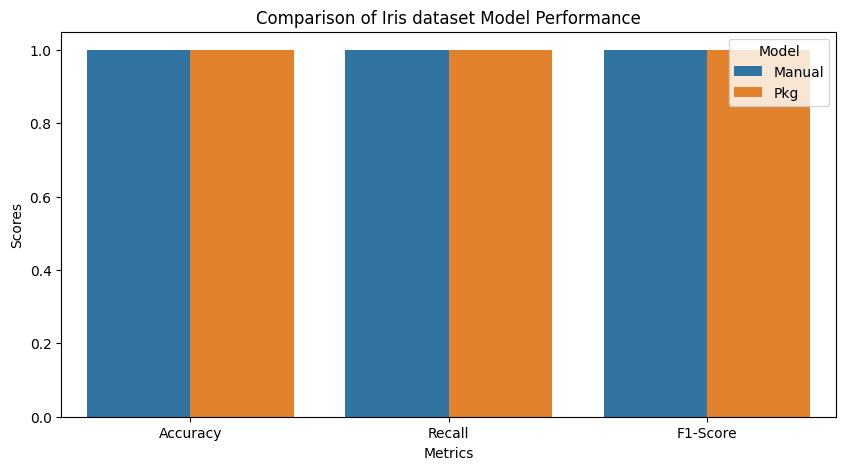

In [63]:
# Compare the metris of Iris dataset: Manual vs shelf pkg results

# dict of manual metrics
metrics_manual = {}
metrics_manual.update({"Accuracy": accuracy_score_manual, "Recall": recall_score_manual, "F1-Score": f1_score_manual})

# dict of pkg metrics
metrics_pkg = {}
metrics_pkg.update({"Accuracy": accuracy_score_pkg, "Recall": recall_score_pkg, "F1-Score": f1_score_pkg})

# create a dataframe
iris_metrics_df = pd.DataFrame({"Metric": metrics_manual.keys(), "Manual": metrics_manual.values(), "Pkg": metrics_pkg.values()})
iris_metrics_df = iris_metrics_df.melt(id_vars='Metric', var_name='Model', value_name='Score')


# plot the metrics side by side
plt.figure(figsize=(10,5))
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Comparison of Iris dataset Model Performance')
sns.barplot(x='Metric', y='Score', hue='Model', data=iris_metrics_df)
plt.show()


Inferece:
 - Both the ways i.e. through custom KNN model and KNeighborsClassifier package, considering k=3, metrics match

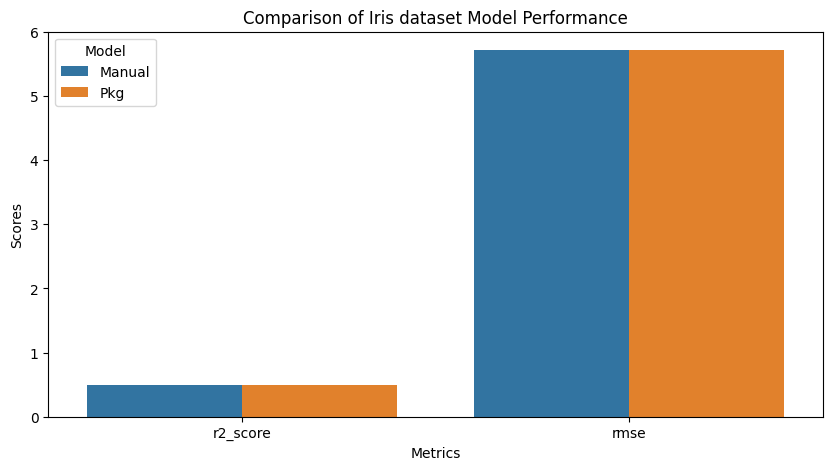

In [64]:
# Compare the metris of Iris dataset: Manual vs shelf pkg results

# dict of manual metrics
metrics_manual = {}
metrics_manual.update({"r2_score": r2_score_manual, "rmse": rmse_manual})

# dict of pkg metrics
metrics_pkg = {}
metrics_pkg.update({"r2_score": r2_score_pkg, "rmse": rmse_pkg})

# create a dataframe
energy_metrics_df = pd.DataFrame({"Metric": metrics_manual.keys(), "Manual": metrics_manual.values(), "Pkg": metrics_pkg.values()})
energy_metrics_df = energy_metrics_df.melt(id_vars='Metric', var_name='Model', value_name='Score')


# plot the metrics side by side
plt.figure(figsize=(10,5))
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Comparison of Iris dataset Model Performance')
sns.barplot(x='Metric', y='Score', hue='Model', data=energy_metrics_df)
plt.show()


Inferece:
- Both the ways i.e. custom KNN model and KNeighborsRegressor package, cosnidering k=7, metrics match and are found to be the best.
- k=3,5 have shown less than 50% r2 score
- Whereas, k=9 on wards r2 score was constant around 50%